# Data Science Lab Project SS24
# APA-IT Informations Technologie GmbH
# News article classification
## Team members:
- Nurzhanat Zhussup
- Mariia
- Gregor
- Danylo

### Data import and preprcoessing

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from modules.preprocess import PreprocessAPA


In [21]:
full_ml = pd.read_csv("/Users/ibragimzhussup/Desktop/APA_Lab/src/data/full_text.csv")
prep_ml = pd.read_csv("/Users/ibragimzhussup/Desktop/APA_Lab/src/data/preprocessed_text.csv")

### Machine Learning Models

#### PREPROCESSED TEXT

In [22]:
from modules.ML_models import ML_Models
ml_modeling = ML_Models()
preproc = PreprocessAPA()
train, test, val = preproc.split_data(prep_ml, test_val=True, n_samples_train=500, test_split_ratio=0.5)

In [23]:
train[['labels', 'label_ids']].drop_duplicates().sort_values(by='label_ids')

,labels,label_ids
353,interview,0
905,NONRELEVANT,1
1333,letter,2
1860,comment,3


In [24]:
preprocessed_df_performance = ml_modeling.run(train, test)

Logistic Regression
              precision    recall  f1-score   support

           0       0.06      0.90      0.11       553
           1       1.00      0.78      0.88     84282
           2       0.21      0.69      0.32      2039
           3       0.06      0.96      0.11       321

    accuracy                           0.78     87195
   macro avg       0.33      0.83      0.35     87195
weighted avg       0.97      0.78      0.86     87195


Random Forest
              precision    recall  f1-score   support

           0       0.07      0.91      0.13       553
           1       0.99      0.77      0.87     84282
           2       0.16      0.68      0.25      2039
           3       0.05      0.92      0.10       321

    accuracy                           0.77     87195
   macro avg       0.32      0.82      0.34     87195
weighted avg       0.96      0.77      0.85     87195


Naive Bayes
              precision    recall  f1-score   support

           0       0.01    

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/ibragimzhussup/anaconda3/lib/python3.11/site-packages/pandas/core/indexes/base.py", line 3791, in get_loc
    return self._engine.get_loc(casted_key)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "index.pyx", line 152, in pandas._libs.index.IndexEngine.get_loc
  File "index.pyx", line 181, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/hashtable_class_helper.pxi", line 7080, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas/_libs/hashtable_class_helper.pxi", line 7088, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'Precision'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/Users/ibragimzhussup/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/8c/_sr2kqv935l1jvwxjljct8680000gn/T/ipykernel_72742/37

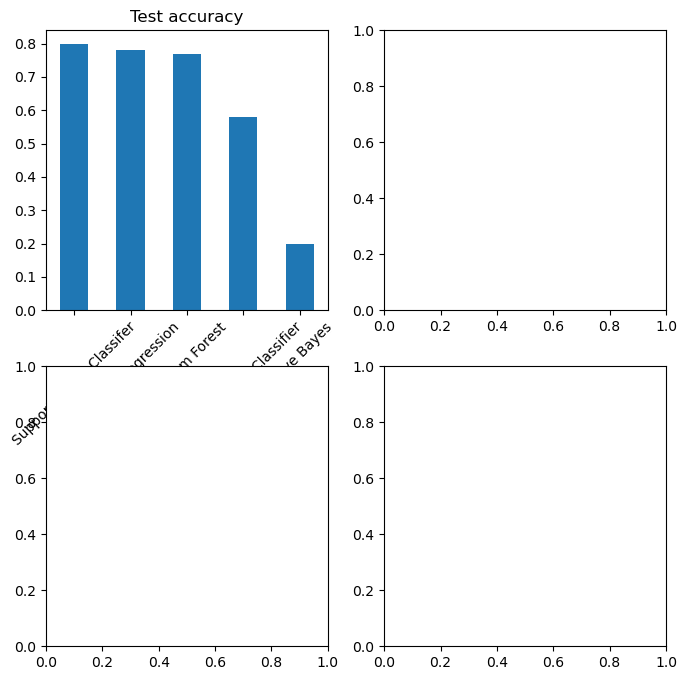

In [26]:
ml_modeling.plot_performance(preprocessed_df_performance)

#### FULL TEXT

In [171]:
full_df_performance = ml_modeling.run(full_ml)

Logistic Regression
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       412
           1       0.86      0.97      0.91       805
           2       0.89      0.23      0.36       135

    accuracy                           0.86      1352
   macro avg       0.87      0.69      0.71      1352
weighted avg       0.87      0.86      0.84      1352


Random Forest
              precision    recall  f1-score   support

           0       0.86      0.73      0.79       412
           1       0.78      0.96      0.86       805
           2       0.00      0.00      0.00       135

    accuracy                           0.79      1352
   macro avg       0.55      0.56      0.55      1352
weighted avg       0.73      0.79      0.75      1352


Naive Bayes
              precision    recall  f1-score   support

           0       0.96      0.52      0.68       412
           1       0.71      1.00      0.83       805
           2       0.00    

/Users/ibragimzhussup/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ibragimzhussup/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ibragimzhussup/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

Support Vector Classifer
              precision    recall  f1-score   support

           0       0.90      0.84      0.87       412
           1       0.85      0.98      0.91       805
           2       0.71      0.21      0.33       135

    accuracy                           0.86      1352
   macro avg       0.82      0.68      0.70      1352
weighted avg       0.85      0.86      0.84      1352


Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.75      0.76      0.76       412
           1       0.84      0.85      0.85       805
           2       0.44      0.40      0.42       135

    accuracy                           0.78      1352
   macro avg       0.68      0.67      0.67      1352
weighted avg       0.77      0.78      0.78      1352




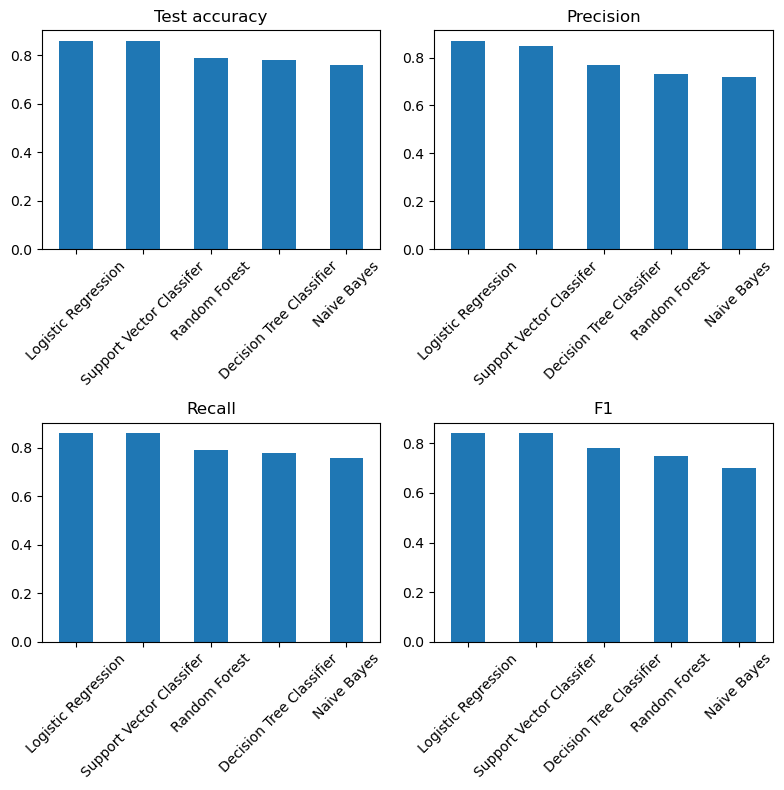

In [172]:
ml_modeling.plot_performance(full_df_performance)

**Training the models on full text is better descision because the F1 score of label 2 has increased significantly.**

**All models have no problem in predicting labels 0 and 1. So the best model in next steps will be the model that maximizes F1 score of label 2**

In [10]:
full_ml.drop('text', axis=1).drop_duplicates()

,label_ids,labels
0,0,interview
1985,1,letter
6095,2,comment


**Label 2 is comment**

In [11]:
lr_bestparams = ml_modeling.fine_tune("logreg", use_all_CPUs=True,
                                      number_of_iterations=50, num_cv=5)

/Users/ibragimzhussup/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ibragimzhussup/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ibragimzhussup/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ibragimzhussup/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ibragimzhussup/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best Parameters for Logistic Regression: {'C': 40.65557684124517, 'max_iter': 682, 'penalty': 'l1', 'solver': 'saga'}
Best Accuracy Score for Logistic Regression: 0.8962662079508089
Total runtime: 0:04:24


In [12]:
lr_bestparams

{'C': 40.65557684124517, 'max_iter': 682, 'penalty': 'l1', 'solver': 'saga'}

In [13]:
svc_bestparams = ml_modeling.fine_tune("svc", use_all_CPUs=True,
                                       number_of_iterations=10, num_cv=5)

Best Parameters for SVC: {'C': 1.2686679007539894, 'degree': 4, 'gamma': 'scale', 'kernel': 'rbf'}
Best Accuracy Score for SVC: 0.8600236653608541
Total runtime: 0:05:48


In [14]:
svc_bestparams

{'C': 1.2686679007539894, 'degree': 4, 'gamma': 'scale', 'kernel': 'rbf'}

In [4]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [16]:
lr_finetuned = LogisticRegression(**lr_bestparams)
lr_finetuned.fit(ml_modeling.X_train_vectorized, ml_modeling.y_train)
svc_finetuned = SVC(**svc_bestparams)
svc_finetuned.fit(ml_modeling.X_train_vectorized, ml_modeling.y_train)


/Users/ibragimzhussup/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


SVC(C=1.2686679007539894, degree=4)

In [17]:
lr_preds = lr_finetuned.predict(ml_modeling.X_test_vectorized)
svc_preds = svc_finetuned.predict(ml_modeling.X_test_vectorized)

print(f"FT LogReg: \n{classification_report(ml_modeling.y_test, lr_preds)}")
print(f"FT SVC: \n{classification_report(ml_modeling.y_test, svc_preds)}")

FT LogReg: 
              precision    recall  f1-score   support

           0       0.87      0.88      0.87       412
           1       0.92      0.94      0.93       805
           2       0.77      0.66      0.71       135

    accuracy                           0.89      1352
   macro avg       0.86      0.83      0.84      1352
weighted avg       0.89      0.89      0.89      1352

FT SVC: 
              precision    recall  f1-score   support

           0       0.89      0.84      0.87       412
           1       0.86      0.97      0.91       805
           2       0.75      0.30      0.43       135

    accuracy                           0.87      1352
   macro avg       0.83      0.70      0.73      1352
weighted avg       0.86      0.87      0.85      1352



**Huge improvement with Logistic Regression in predicting label 2**

**Another interesting model to look into would be Decision Tree, because it has the best F1 score for label 2 as a basic model**

**Let's try finetuning it and see the results**

In [18]:
dt_bestparams = ml_modeling.fine_tune("dt", use_all_CPUs=True,
                                       number_of_iterations=100, num_cv=5)
dt_bestparams

Best Parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 7, 'splitter': 'random'}
Best Accuracy Score for Decision Tree: 0.8150885484618371
Total runtime: 232.93222284317017 seconds


{'criterion': 'gini',
 'max_depth': 6,
 'min_samples_leaf': 4,
 'min_samples_split': 7,
 'splitter': 'random'}

In [19]:
from sklearn.tree import DecisionTreeClassifier
dt_finetuned = DecisionTreeClassifier(**dt_bestparams)
dt_finetuned.fit(ml_modeling.X_train_vectorized, ml_modeling.y_train)
dt_preds = dt_finetuned.predict(ml_modeling.X_test_vectorized)
print(f"FT DT: \n{classification_report(ml_modeling.y_test, dt_preds)}")

FT DT: 
              precision    recall  f1-score   support

           0       0.78      0.69      0.73       412
           1       0.79      0.93      0.86       805
           2       0.73      0.22      0.34       135

    accuracy                           0.79      1352
   macro avg       0.77      0.61      0.64      1352
weighted avg       0.78      0.79      0.77      1352



**The situation got even worse for label 2.**

**We will stick with the best model in Machine Learning section so far, the Logistic Regression!**

### Deep Learning Models

**As we saw before, training on full text is way much better than training on preprocessed text. Therefore, we will train our deepl learning models on full text**

**The only thing we are going to experiment with is the embedding layer. Other layers will stay the same. The best combination of layers in our opinion was found in the test_notebook.ipynb with the iteration method.**

#### Recurrent Neural Networks (LSTM)

##### Simple tensorflow Embedding

In [5]:
from DL_models import RNN, CNN

2024-04-05 21:45:31.734960: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [21]:
lstm = RNN()
lstm.train_test(full_ml, 'text', 'label_ids')
lstm.tokenize()
X_train, X_test, y_train, y_test = lstm.pad_and_label_preproc()
lstm_model, early_stop = lstm.build_model(use_basic_embed=True)

Attributes updated, use <self.X_train> etc. to use values
Attributes updated, use <self.train_seq> etc. to use values
Using basic embedding
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 200)          2000000   
                                                                 
 bidirectional (Bidirection  (None, 500, 256)          336896    
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 500, 256)          0         
                                                                 
 global_max_pooling1d (Glob  (None, 256)               0         
 alMaxPooling1D)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 256)        

In [22]:
lstm_model.fit(X_train, y_train, batch_size=64,
               epochs=100, callbacks=[early_stop], validation_data=(X_test,
                                                                    y_test))

Epoch 1/100
85/85 [==============================] - 119s 1s/step - loss: 0.6983 - accuracy: 0.7518 - val_loss: 0.5247 - val_accuracy: 0.8358
Epoch 2/100
85/85 [==============================] - 108s 1s/step - loss: 0.4297 - accuracy: 0.8469 - val_loss: 0.5628 - val_accuracy: 0.8240
Epoch 3/100
85/85 [==============================] - 104s 1s/step - loss: 0.2811 - accuracy: 0.8976 - val_loss: 0.4063 - val_accuracy: 0.8565
Epoch 4/100
85/85 [==============================] - 101s 1s/step - loss: 0.2229 - accuracy: 0.9186 - val_loss: 0.3914 - val_accuracy: 0.8484
Epoch 5/100
85/85 [==============================] - 102s 1s/step - loss: 0.1572 - accuracy: 0.9554 - val_loss: 0.4059 - val_accuracy: 0.8373
Epoch 6/100
85/85 [==============================] - 103s 1s/step - loss: 0.1103 - accuracy: 0.9671 - val_loss: 0.3485 - val_accuracy: 0.8706
Epoch 7/100
85/85 [==============================] - 103s 1s/step - loss: 0.0769 - accuracy: 0.9765 - val_loss: 0.3854 - val_accuracy: 0.8772
Epoch 

<Axes: >

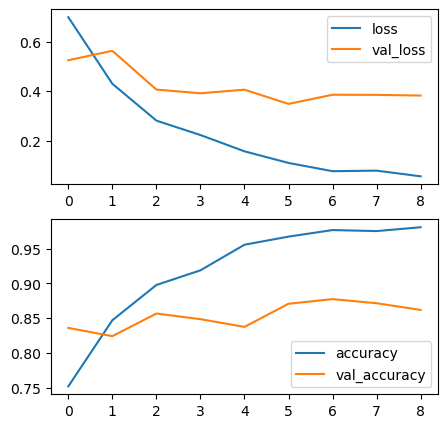

In [23]:
fig, ax = plt.subplots(nrows=2, figsize=(5,5))
data = pd.DataFrame(lstm_model.history.history)
data[['loss', 'val_loss']].plot(ax=ax[0])
data[['accuracy', 'val_accuracy']].plot(ax=ax[1])

In [24]:
lstm_preds = lstm_model.predict(X_test)
print(classification_report(np.argmax(y_test, axis=1), np.argmax(lstm_preds, axis=1)))

43/43 [==============================] - 8s 164ms/step
              precision    recall  f1-score   support

           0       0.87      0.90      0.88       412
           1       0.93      0.89      0.91       805
           2       0.58      0.66      0.62       135

    accuracy                           0.87      1352
   macro avg       0.79      0.82      0.80      1352
weighted avg       0.88      0.87      0.87      1352



##### Using pretrained embeddings

##### Google NNLM 50 Dimensions (German Language)

**Token based text embeddings trained on various Google News datasets**

In [8]:
import tensorflow_hub as hub
import tensorflow as tf

In [53]:
hub_layer_de_50 = hub.KerasLayer("https://www.kaggle.com/models/google/nnlm/frameworks/TensorFlow2/variations/de-dim50/versions/1",
                            dtype=tf.string, trainable=False, input_shape=[])
hub_layer_de_128 = hub.KerasLayer("https://www.kaggle.com/models/google/nnlm/frameworks/TensorFlow2/variations/de-dim128/versions/1",
                            dtype=tf.string, trainable=False, input_shape=[])

In [54]:
lstm = RNN()
lstm.embedding = hub_layer_de_50
lstm.train_test(full_ml, 'text', 'label_ids')
lstm_model, early_stop = lstm.build_model(use_basic_embed=False)

Attributes updated, use <self.X_train> etc. to use values
Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_8 (KerasLayer)  (None, 50)                48948250  
                                                                 
 reshape_13 (Reshape)        (None, 1, 50)             0         
                                                                 
 bidirectional (Bidirection  (None, 1, 256)            183296    
 al)                                                             
                                                                 
 dropout_28 (Dropout)        (None, 1, 256)            0         
                                                                 
 global_max_pooling1d_10 (G  (None, 256)               0         
 lobalMaxPooling1D)                                              
                                                             

In [55]:
lstm_model.fit(lstm.X_train, y_train, epochs=100, verbose = 2,
               callbacks=[early_stop], validation_data=(lstm.X_test, y_test))

Epoch 1/100


169/169 - 8s - loss: 0.6558 - accuracy: 0.7587 - val_loss: 0.4659 - val_accuracy: 0.8284 - 8s/epoch - 45ms/step
Epoch 2/100
169/169 - 2s - loss: 0.4604 - accuracy: 0.8256 - val_loss: 0.4087 - val_accuracy: 0.8417 - 2s/epoch - 11ms/step
Epoch 3/100
169/169 - 2s - loss: 0.4244 - accuracy: 0.8351 - val_loss: 0.3707 - val_accuracy: 0.8476 - 2s/epoch - 11ms/step
Epoch 4/100
169/169 - 2s - loss: 0.4087 - accuracy: 0.8419 - val_loss: 0.3653 - val_accuracy: 0.8550 - 2s/epoch - 10ms/step
Epoch 5/100
169/169 - 2s - loss: 0.3807 - accuracy: 0.8534 - val_loss: 0.3576 - val_accuracy: 0.8587 - 2s/epoch - 11ms/step
Epoch 6/100
169/169 - 2s - loss: 0.3777 - accuracy: 0.8524 - val_loss: 0.3431 - val_accuracy: 0.8654 - 2s/epoch - 13ms/step
Epoch 7/100
169/169 - 2s - loss: 0.3675 - accuracy: 0.8600 - val_loss: 0.3438 - val_accuracy: 0.8646 - 2s/epoch - 9ms/step
Epoch 8/100
169/169 - 1s - loss: 0.3514 - accuracy: 0.8643 - val_loss: 0.3487 - val_accuracy: 0.8528 - 1s/epoch - 9ms/step
Epoch 9/100
169/169 - 

In [56]:
lstm_preds = lstm_model.predict(lstm.X_test)
print(classification_report(lstm.y_test, np.argmax(lstm_preds, axis=1)))

43/43 [==============================] - 1s 5ms/step
              precision    recall  f1-score   support

           0       0.93      0.86      0.89       412
           1       0.90      0.95      0.92       805
           2       0.69      0.63      0.66       135

    accuracy                           0.89      1352
   macro avg       0.84      0.81      0.82      1352
weighted avg       0.89      0.89      0.89      1352



##### Google NNLM 128 Dimensions (German Language)

**Token based text embeddings trained on various Google News datasets**

In [57]:
lstm = RNN()
lstm.embedding = hub_layer_de_128
lstm.train_test(full_ml, 'text', 'label_ids')
lstm_model, early_stop = lstm.build_model(use_basic_embed=False, reshape=128)

Attributes updated, use <self.X_train> etc. to use values


Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_9 (KerasLayer)  (None, 128)               125307520 
                                                                 
 reshape_14 (Reshape)        (None, 1, 128)            0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 1, 256)            263168    
 onal)                                                           
                                                                 
 dropout_32 (Dropout)        (None, 1, 256)            0         
                                                                 
 global_max_pooling1d_11 (G  (None, 256)               0         
 lobalMaxPooling1D)                                              
                                                                 
 dropout_33 (Dropout)        (None, 256)             

In [58]:
lstm_model.fit(lstm.X_train, y_train, epochs=100, verbose=2,
               callbacks=[early_stop], validation_data=(lstm.X_test, y_test))

Epoch 1/100
169/169 - 9s - loss: 0.6258 - accuracy: 0.7766 - val_loss: 0.4248 - val_accuracy: 0.8328 - 9s/epoch - 55ms/step
Epoch 2/100
169/169 - 2s - loss: 0.4441 - accuracy: 0.8364 - val_loss: 0.3852 - val_accuracy: 0.8491 - 2s/epoch - 13ms/step
Epoch 3/100
169/169 - 2s - loss: 0.4052 - accuracy: 0.8449 - val_loss: 0.3439 - val_accuracy: 0.8676 - 2s/epoch - 13ms/step
Epoch 4/100
169/169 - 2s - loss: 0.3742 - accuracy: 0.8585 - val_loss: 0.3471 - val_accuracy: 0.8550 - 2s/epoch - 12ms/step
Epoch 5/100
169/169 - 3s - loss: 0.3556 - accuracy: 0.8659 - val_loss: 0.3465 - val_accuracy: 0.8646 - 3s/epoch - 16ms/step
Epoch 6/100
169/169 - 2s - loss: 0.3553 - accuracy: 0.8632 - val_loss: 0.3107 - val_accuracy: 0.8735 - 2s/epoch - 14ms/step
Epoch 7/100
169/169 - 2s - loss: 0.3341 - accuracy: 0.8707 - val_loss: 0.2994 - val_accuracy: 0.8757 - 2s/epoch - 12ms/step
Epoch 8/100
169/169 - 2s - loss: 0.3335 - accuracy: 0.8724 - val_loss: 0.3406 - val_accuracy: 0.8602 - 2s/epoch - 10ms/step
Epoch 9/

In [59]:
lstm_preds = lstm_model.predict(lstm.X_test)
print(classification_report(lstm.y_test, np.argmax(lstm_preds, axis=1)))

43/43 [==============================] - 1s 5ms/step
              precision    recall  f1-score   support

           0       0.93      0.88      0.90       412
           1       0.90      0.95      0.93       805
           2       0.68      0.59      0.63       135

    accuracy                           0.89      1352
   macro avg       0.84      0.80      0.82      1352
weighted avg       0.89      0.89      0.89      1352



#### Convolutional Neural Networks
##### Simple tensorflow Embedding

In [13]:
cnn = CNN()
cnn.train_test(full_ml, 'text', 'label_ids')
cnn.tokenize()
X_train, X_test, y_train, y_test = cnn.pad_and_label_preproc()
cnn_model, early_stop = cnn.build_model(use_basic_embed=True)

Attributes updated, use <self.X_train> etc. to use values
Attributes updated, use <self.train_seq> etc. to use values
Using basic embedding
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 200)          2000000   
                                                                 
 dropout_2 (Dropout)         (None, 500, 200)          0         
                                                                 
 conv1d_3 (Conv1D)           (None, 500, 128)          76928     
                                                                 
 max_pooling1d (MaxPooling1  (None, 250, 128)          0         
 D)                                                              
                                                                 
 conv1d_4 (Conv1D)           (None, 250, 64)           24640     
                                              

In [14]:
cnn_model.fit(X_train, y_train, epochs=100,
               callbacks=[early_stop], validation_data=(X_test, y_test))

Epoch 1/100
169/169 [==============================] - 33s 189ms/step - loss: 0.4736 - accuracy: 0.8097 - val_loss: 0.3515 - val_accuracy: 0.8536
Epoch 2/100
169/169 [==============================] - 30s 180ms/step - loss: 0.2781 - accuracy: 0.8964 - val_loss: 0.3264 - val_accuracy: 0.8661
Epoch 3/100
169/169 [==============================] - 28s 166ms/step - loss: 0.1642 - accuracy: 0.9482 - val_loss: 0.3318 - val_accuracy: 0.8706
Epoch 4/100
169/169 [==============================] - 26s 151ms/step - loss: 0.1054 - accuracy: 0.9663 - val_loss: 0.3836 - val_accuracy: 0.8624
Epoch 5/100
169/169 [==============================] - 25s 147ms/step - loss: 0.0702 - accuracy: 0.9763 - val_loss: 0.4642 - val_accuracy: 0.8861


In [15]:
cnn_preds = cnn_model.predict(X_test)
print(classification_report(cnn.y_test, np.argmax(cnn_preds, axis=1)))

43/43 [==============================] - 1s 29ms/step
              precision    recall  f1-score   support

           0       0.95      0.79      0.86       412
           1       0.90      0.95      0.93       805
           2       0.50      0.58      0.54       135

    accuracy                           0.87      1352
   macro avg       0.78      0.77      0.78      1352
weighted avg       0.87      0.87      0.87      1352



##### Google NNLM 50 Dimensions (German Language)

**Token based text embeddings trained on various Google News datasets**

In [60]:
cnn = CNN()
cnn.embedding = hub_layer_de_50
cnn.train_test(full_ml, 'text', 'label_ids')
cnn_model, early_stop = cnn.build_model(use_basic_embed=False, reshape=50, add_globalmaxpool=False)

Attributes updated, use <self.X_train> etc. to use values
Using custom embedding
Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_8 (KerasLayer)  (None, 50)                48948250  
                                                                 
 reshape_15 (Reshape)        (None, 1, 50)             0         
                                                                 
 dropout_36 (Dropout)        (None, 1, 50)             0         
                                                                 
 conv1d_42 (Conv1D)          (None, 1, 128)            19328     
                                                                 
 conv1d_43 (Conv1D)          (None, 1, 64)             24640     
                                                                 
 conv1d_44 (Conv1D)          (None, 1, 32)             6176      
                                      

In [61]:
cnn_model.fit(cnn.X_train, y_train, epochs=100, verbose=2,
               callbacks=[early_stop], validation_data=(cnn.X_test, y_test))

Epoch 1/100


169/169 - 3s - loss: 0.6535 - accuracy: 0.7568 - val_loss: 0.4679 - val_accuracy: 0.8254 - 3s/epoch - 18ms/step
Epoch 2/100
169/169 - 1s - loss: 0.4845 - accuracy: 0.8188 - val_loss: 0.4850 - val_accuracy: 0.8166 - 957ms/epoch - 6ms/step
Epoch 3/100
169/169 - 1s - loss: 0.4625 - accuracy: 0.8180 - val_loss: 0.4745 - val_accuracy: 0.8188 - 963ms/epoch - 6ms/step
Epoch 4/100
169/169 - 1s - loss: 0.4349 - accuracy: 0.8260 - val_loss: 0.4201 - val_accuracy: 0.8262 - 1s/epoch - 6ms/step
Epoch 5/100
169/169 - 1s - loss: 0.4285 - accuracy: 0.8245 - val_loss: 0.4478 - val_accuracy: 0.8277 - 966ms/epoch - 6ms/step
Epoch 6/100
169/169 - 1s - loss: 0.4221 - accuracy: 0.8328 - val_loss: 0.4419 - val_accuracy: 0.8284 - 986ms/epoch - 6ms/step
Epoch 7/100
169/169 - 1s - loss: 0.4205 - accuracy: 0.8258 - val_loss: 0.5188 - val_accuracy: 0.8084 - 1s/epoch - 7ms/step


In [62]:
cnn_preds = cnn_model.predict(cnn.X_test)
print(classification_report(cnn.y_test, np.argmax(cnn_preds, axis=1)))

43/43 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.95      0.77      0.85       412
           1       0.79      0.98      0.88       805
           2       0.44      0.05      0.09       135

    accuracy                           0.83      1352
   macro avg       0.73      0.60      0.61      1352
weighted avg       0.80      0.83      0.79      1352



##### Google NNLM 128 Dimensions (German Language)

**Token based text embeddings trained on various Google News datasets**

In [63]:
cnn = CNN()
cnn.embedding = hub_layer_de_128
cnn.train_test(full_ml, 'text', 'label_ids')
cnn_model, early_stop = cnn.build_model(use_basic_embed=False, reshape=128, add_globalmaxpool=False)

Attributes updated, use <self.X_train> etc. to use values
Using custom embedding
Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_9 (KerasLayer)  (None, 128)               125307520 
                                                                 
 reshape_16 (Reshape)        (None, 1, 128)            0         
                                                                 
 dropout_38 (Dropout)        (None, 1, 128)            0         
                                                                 
 conv1d_45 (Conv1D)          (None, 1, 128)            49280     
                                                                 
 conv1d_46 (Conv1D)          (None, 1, 64)             24640     
                                                                 
 conv1d_47 (Conv1D)          (None, 1, 32)             6176      
                                      

In [64]:
cnn_model.fit(cnn.X_train, y_train, epochs=100, verbose=2,
               callbacks=[early_stop], validation_data=(cnn.X_test, y_test))

Epoch 1/100


169/169 - 3s - loss: 0.6343 - accuracy: 0.7844 - val_loss: 0.4409 - val_accuracy: 0.8291 - 3s/epoch - 20ms/step
Epoch 2/100
169/169 - 1s - loss: 0.4403 - accuracy: 0.8330 - val_loss: 0.4334 - val_accuracy: 0.8247 - 1s/epoch - 9ms/step
Epoch 3/100
169/169 - 1s - loss: 0.4079 - accuracy: 0.8397 - val_loss: 0.3556 - val_accuracy: 0.8491 - 1s/epoch - 8ms/step
Epoch 4/100
169/169 - 2s - loss: 0.3957 - accuracy: 0.8436 - val_loss: 0.3490 - val_accuracy: 0.8558 - 2s/epoch - 9ms/step
Epoch 5/100
169/169 - 1s - loss: 0.3776 - accuracy: 0.8545 - val_loss: 0.3766 - val_accuracy: 0.8528 - 1s/epoch - 6ms/step
Epoch 6/100
169/169 - 1s - loss: 0.3696 - accuracy: 0.8534 - val_loss: 0.3171 - val_accuracy: 0.8728 - 1s/epoch - 8ms/step
Epoch 7/100
169/169 - 1s - loss: 0.3686 - accuracy: 0.8536 - val_loss: 0.3401 - val_accuracy: 0.8698 - 1s/epoch - 6ms/step
Epoch 8/100
169/169 - 1s - loss: 0.3501 - accuracy: 0.8630 - val_loss: 0.3285 - val_accuracy: 0.8609 - 1s/epoch - 6ms/step
Epoch 9/100
169/169 - 2s - 

In [65]:
cnn_preds = cnn_model.predict(cnn.X_test)
print(classification_report(cnn.y_test, np.argmax(cnn_preds, axis=1)))

43/43 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

           0       0.94      0.88      0.91       412
           1       0.89      0.94      0.92       805
           2       0.67      0.59      0.62       135

    accuracy                           0.89      1352
   macro avg       0.83      0.80      0.82      1352
weighted avg       0.88      0.89      0.88      1352



##### 128 Dimensional Embedding Layer with Additional GlobalMaxPooling1D Layer

Attributes updated, use <self.X_train> etc. to use values
Using custom embedding
Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_9 (KerasLayer)  (None, 128)               125307520 
                                                                 
 reshape_20 (Reshape)        (None, 1, 128)            0         
                                                                 
 dropout_46 (Dropout)        (None, 1, 128)            0         
                                                                 
 conv1d_57 (Conv1D)          (None, 1, 128)            49280     
                                                                 
 conv1d_58 (Conv1D)          (None, 1, 64)             24640     
                                                                 
 conv1d_59 (Conv1D)          (None, 1, 32)             6176      
                                      

<Axes: >

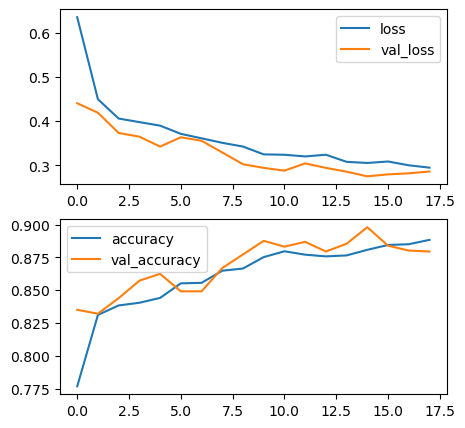

In [72]:
cnn = CNN()
cnn.embedding = hub_layer_de_128
cnn.train_test(full_ml, 'text', 'label_ids')
cnn_model, early_stop = cnn.build_model(use_basic_embed=False, reshape=128, add_globalmaxpool=True)
cnn_model.fit(cnn.X_train, y_train, epochs=100, verbose=0,
               callbacks=[early_stop], validation_data=(cnn.X_test, y_test))
fig, ax = plt.subplots(nrows=2, figsize=(5,5))
data = pd.DataFrame(cnn_model.history.history)
data[['loss', 'val_loss']].plot(ax=ax[0])
data[['accuracy', 'val_accuracy']].plot(ax=ax[1])

In [73]:
cnn_preds = cnn_model.predict(cnn.X_test)
print(classification_report(cnn.y_test, np.argmax(cnn_preds, axis=1)))

43/43 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       412
           1       0.90      0.96      0.93       805
           2       0.73      0.57      0.64       135

    accuracy                           0.90      1352
   macro avg       0.86      0.81      0.83      1352
weighted avg       0.90      0.90      0.89      1352



##### Logistic Regression and Embeddings Integration

**Because the Logistic Regression was the best model in the ML section and DL models with external embedding typically perform better, here we integrate the embedding layer with Logistic Regression to see if the results get better**

In [104]:
# Define a custom transformer to integrate TensorFlow Hub with scikit-learn
class TFHubEmbeddingTransformer():
    def __init__(self, model_url):
        self.model_url = model_url
        self.embed = hub.load(model_url)

    def transform(self, X):
        return self.embed(X).numpy()

model_url = "https://www.kaggle.com/models/google/nnlm/frameworks/TensorFlow2/variations/de-dim128/versions/1"

transformer = TFHubEmbeddingTransformer(model_url=model_url)
X_train_transformed = transformer.transform(cnn.X_train)
X_test_transformed = transformer.transform(cnn.X_test)

In [105]:
logreg = LogisticRegression(**lr_bestparams)
logreg.fit(X_train_transformed, cnn.y_train)
y_pred = logreg.predict(X_test_transformed)
print(classification_report(cnn.y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.86      0.88       412
           1       0.87      0.95      0.91       805
           2       0.65      0.38      0.48       135

    accuracy                           0.87      1352
   macro avg       0.81      0.73      0.76      1352
weighted avg       0.86      0.87      0.86      1352



/Users/ibragimzhussup/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [111]:
logreg = LogisticRegression(**lr_bestparams)
logreg.fit(ml_modeling.X_train_vectorized, cnn.y_train)
y_pred = logreg.predict(ml_modeling.X_test_vectorized)
print(classification_report(cnn.y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.88      0.87       412
           1       0.92      0.94      0.93       805
           2       0.77      0.66      0.71       135

    accuracy                           0.89      1352
   macro avg       0.86      0.83      0.84      1352
weighted avg       0.89      0.89      0.89      1352



/Users/ibragimzhussup/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


### LLM Section

In [113]:
import pandas as pd
import numpy as np
from tqdm.auto import tqdm
import tensorflow as tf
from transformers import BertTokenizer

In [115]:
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

In [124]:
token = tokenizer.encode_plus(
    full_ml['text'].iloc[0],
    max_length = 500,
    truncation=True,
    padding ='max_length',
    add_special_tokens=True,
    return_tensors='tf'
)

In [126]:
X_input_ids = np.zeros((len(full_ml), 500))
X_attn_masks = np.zeros((len(full_ml), 500))

In [127]:
def generate_training_data(df, ids, masks, tokenizer):
    for i, text in tqdm(enumerate(full_ml['text'])):
        tokenized_text = tokenizer.encode_plus(
            text,
            max_length = 500,
            truncation=True,
            padding ='max_length',
            add_special_tokens=True,
            return_tensors='tf'
        )
        ids[i,:] = tokenized_text.input_ids
        masks[i,:] = tokenized_text.attention_mask
    return ids, masks

In [128]:
X_input_ids, X_attn_masks = generate_training_data(full_ml,
                                                   X_input_ids,
                                                   X_attn_masks,
                                                   tokenizer)

0it [00:00, ?it/s]

In [135]:
labels = np.zeros((len(full_ml), 3))
labels[np.arange(len(full_ml)), full_ml['label_ids'].values] = 1

In [136]:
dataset = tf.data.Dataset.from_tensor_slices((X_input_ids, X_attn_masks, labels))

In [137]:
dataset.take(1)

<_TakeDataset element_spec=(TensorSpec(shape=(500,), dtype=tf.float64, name=None), TensorSpec(shape=(500,), dtype=tf.float64, name=None), TensorSpec(shape=(3,), dtype=tf.float64, name=None))>

In [138]:
dataset = dataset.shuffle(10000).batch(16, drop_remainder=True)

In [139]:
p = 0.8
train_size = int((len(full_ml)//16)*p)

In [141]:
train_dataset = dataset.take(train_size)
test_dataset = dataset.skip(train_size)

In [155]:
def map_example_to_dict(input_ids, attention_masks, label):
    return {
        'input_ids': input_ids,
        'attention_mask': attention_masks
    }, label

train_dataset = train_dataset.map(map_example_to_dict)
test_dataset = test_dataset.map(map_example_to_dict)

In [156]:
from transformers import TFBertModel

In [161]:
bert_model = TFBertModel.from_pretrained('bert-base-cased')
bert_model.trainable = False

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [162]:
input_ids = tf.keras.layers.Input(shape=(500,), name='input_ids', dtype='int32')
attention_masks = tf.keras.layers.Input(shape=(500,), name='attention_mask', dtype='int32')

bert_embds = bert_model.bert(input_ids, attention_mask=attention_masks)[1]
hidden_layer = tf.keras.layers.Dense(512, activation = 'relu', name='hidden_layer')(bert_embds)
output_layer = tf.keras.layers.Dense(3, activation ='softmax', name='output_layer')(hidden_layer)

model = tf.keras.Model(inputs=[input_ids, attention_masks], outputs=output_layer)
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 500)]                0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 500)]                0         []                            
 )                                                                                                
                                                                                                  
 bert (TFBertMainLayer)      TFBaseModelOutputWithPooli   1083102   ['input_ids[0][0]',           
                             ngAndCrossAttentions(last_   72         'attention_mask[0][0]']      
                             hidden_state=(None, 500, 7                                     

In [163]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
loss_func = tf.keras.losses.CategoricalCrossentropy()
acc = tf.keras.metrics.CategoricalAccuracy('accuracy')

model.compile(optimizer=optimizer, loss=loss_func, metrics=[acc])

In [164]:
hist = model.fit(train_dataset, validation_data=test_dataset, epochs=3)

Epoch 1/3
337/337 [==============================] - 5266s 16s/step - loss: 0.8753 - accuracy: 0.6161 - val_loss: 0.8362 - val_accuracy: 0.6051
Epoch 2/3
337/337 [==============================] - 4994s 15s/step - loss: 0.7630 - accuracy: 0.6500 - val_loss: 0.7981 - val_accuracy: 0.7015
Epoch 3/3
337/337 [==============================] - 4958s 15s/step - loss: 0.7446 - accuracy: 0.6625 - val_loss: 0.7367 - val_accuracy: 0.6640


In [165]:
model.save("finetuned_bert")

INFO:tensorflow:Assets written to: finetuned_bert/assets


INFO:tensorflow:Assets written to: finetuned_bert/assets


In [167]:
model.evaluate(test_dataset)

 1/85 [..............................] - ETA: 16:03 - loss: 0.6978 - accuracy: 0.6875

KeyboardInterrupt: 